In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sns.set_style('darkgrid')
sns.set_context('notebook')

In [2]:
# K channel
def alpha_n(v):
    if v == 10:
        return 0.1
    return 0.01*(-v + 10)/(np.exp((-v + 10)/10) - 1)

def beta_n(v):
    return 0.125*np.exp(-v/80)

def n_inf(v):
    return alpha_n(v)/(alpha_n(v) + beta_n(v))

In [3]:
# Na channel (activating)
def alpha_m(v):
    if v == 25:
        return 1
    return 0.1*(-v + 25)/(np.exp((-v + 25)/10) - 1)

def beta_m(v):
    return 4*np.exp(-v/18)

def m_inf(v):
    return alpha_m(v)/(alpha_m(v) + beta_m(v))

In [4]:
# Na channel (inactivating)
def alpha_h(v):
    return 0.07*np.exp(-v/20)

def beta_h(v):
    return 1/(np.exp((-v + 30)/10) + 1)

def h_inf(v):
    return alpha_h(v)/(alpha_h(v) + beta_h(v))

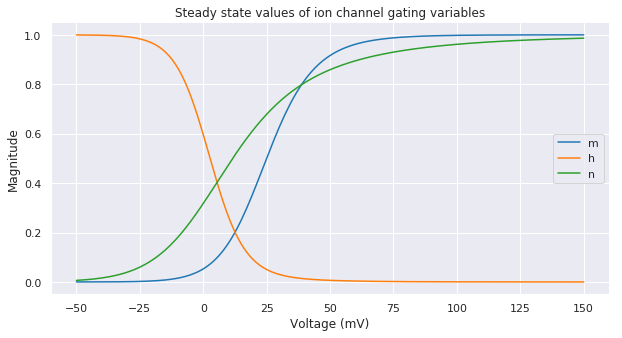

In [5]:
### channel activity ###
voltages = np.arange(-50, 151) # mV
trace = np.zeros((len(voltages), 3))
for i, v in enumerate(voltages):
    trace[i] = m_inf(v), h_inf(v), n_inf(v)

plt.figure(figsize=(10,5))
plt.plot(voltages, trace)
plt.legend(('m','h','n'))
plt.title('Steady state values of ion channel gating variables')
plt.ylabel('Magnitude')
plt.xlabel('Voltage (mV)')
sns.despine()

In [6]:
## HH Parameters
v_rest = 0  # mV
c_m = 1  # uF/cm2
gbar_na = 120  # mS/cm2
gbar_k = 36  # mS/cm2
gbar_l = 0.3  # mS/cm2
e_na = 115  # mV
e_k = -12  # mV
e_l = 10.613  # mV

In [7]:
## setup parameters and state variables
T = 55  # ms
dt = 0.025  # ms
time = np.arange(0,T+dt,dt)

## Stimulus
stim = np.zeros(len(time))
for i, t in enumerate(time):
    if 5 <= t <= 30:
        stim[i] = 10 # uA/cm2

In [8]:
## Simulate Model
v_m = np.zeros(len(time)) # mV
v_m[0] = v_rest
m = m_inf(v_rest)     
h = h_inf(v_rest)
n = n_inf(v_rest)

for i in range(1, len(time)):
    v_last = v_m[i-1]
    
    # update channel conductances
    g_na = gbar_na*(m**3)*h
    g_k  = gbar_k*(n**4)
    g_l  = gbar_l

    # update membrane voltage
    v_delta = (stim[i-1] -
               g_na*(v_last - e_na) - 
               g_k*(v_last - e_k) - 
               g_l*(v_last - e_l)) / c_m * dt
    v_m[i] = v_last + v_delta
    
    # update channel dynamics
    m += (alpha_m(v_last)*(1 - m) - beta_m(v_last)*m)*dt
    h += (alpha_h(v_last)*(1 - h) - beta_h(v_last)*h)*dt
    n += (alpha_n(v_last)*(1 - n) - beta_n(v_last)*n)*dt    


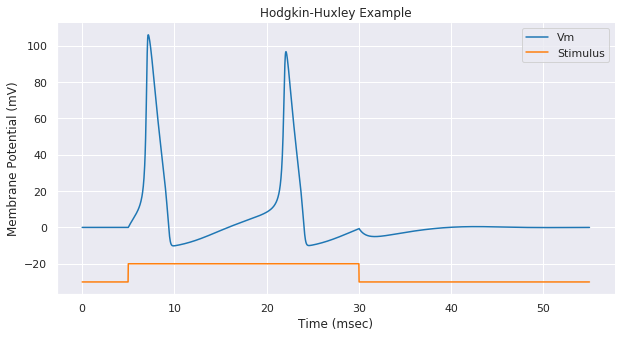

In [9]:
## plot membrane potential trace
plt.figure(figsize=(10,5))
plt.plot(time, v_m)
plt.plot(time, -30+stim)
plt.legend(('Vm', 'Stimulus'))
plt.title('Hodgkin-Huxley Example')
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (msec)')
sns.despine()